In [1]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import numpy as np


In [2]:
data= np.load('path/to/notebooks/examples/Evt343.noMoon.thresh10.hidden.npy', #the plotted one is Event54 whose table is in the examples dir
              allow_pickle=True, encoding='latin1', fix_imports=True).flat[0]
events = list(data.keys())
sites = list(data[events[0]].keys())


In [3]:
custom_lines = [Line2D([0], [0], color='red', lw=4, alpha=0.3),
                Line2D([0], [0], color='yellow', lw=4,alpha=0.3),
                Line2D([0], [0], color='green', lw=4,alpha=0.3),
                Line2D([0], [0], marker='o', color='red',
                          markerfacecolor='red', markersize=5),
                Line2D([0], [0], marker='o', color='g',
                          markerfacecolor='g', markersize=5)]

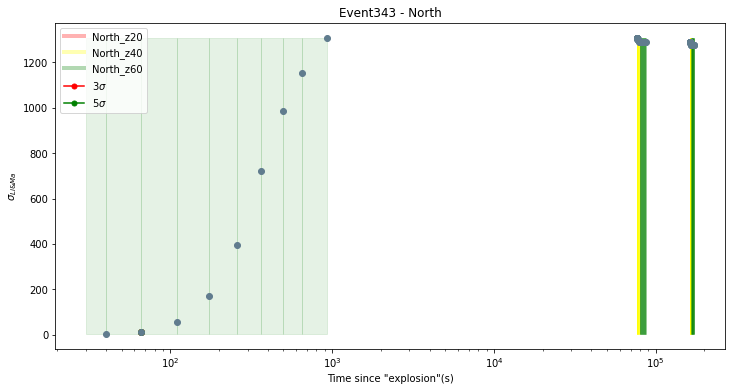

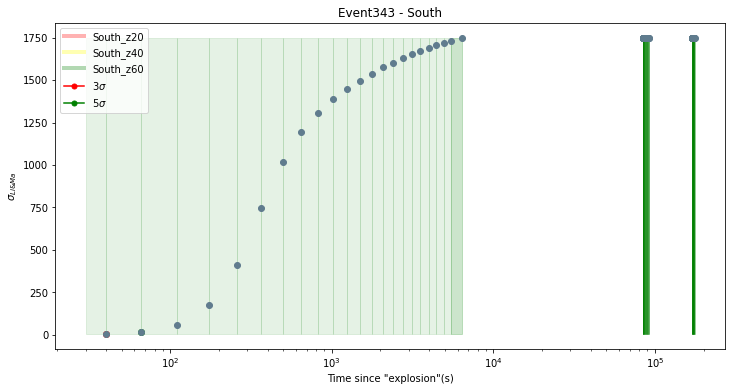

In [4]:
for event in events:
    summed={event:{}}
    for site in sites:
        summed[event]={site:{}}
        summed[event][site]={'t_start':[],'t_stop':[],'irf':[],'significance':[], 'variance':[]}
        fig, axes = plt.subplots(1 ,figsize=(12,6))
        for night in data[event][site]:
            if night != 'first_night_start':
                if type(data[event][site][night]['irf']) == float:
                    print(f'\tThis contains NaNs event---> the source is not observable at the site {site} during {night}.')
                else:
                    summed[event][site]['t_stop'].append(data[event][site][night]['t_stop'])
                    summed[event][site]['t_start'].append(data[event][site][night]['t_start'])
                    summed[event][site]['irf'].append(data[event][site][night]['irf'])
                    summed[event][site]['significance'].append(data[event][site][night]['significance'])
                    summed[event][site]['variance'].append(data[event][site][night]['variance'])



                if '3sigma' in data[event][site][night].keys():
                    axes.errorbar (data[event][site][night]['3sigma'][0], data[event][site][night]['3sigma'][1],
                               color='red',fmt='o')
                if '5sigma' in data[event][site][night].keys():
                    axes.errorbar (data[event][site][night]['5sigma'][0], data[event][site][night]['5sigma'][1],
                               color='g',fmt='o')

        
        summed[event][site]['t_stop']= np.array([ elem for singleList in summed[event][site]['t_stop'] for elem in singleList])
        summed[event][site]['t_start']= np.array([ elem for singleList in summed[event][site]['t_start'] for elem in singleList])
        summed[event][site]['irf']= np.array([ elem for singleList in summed[event][site]['irf'] for elem in singleList])
        summed[event][site]['significance']= np.array([ elem for singleList in summed[event][site]['significance'] for elem in singleList])
        summed[event][site]['variance']= np.array([ elem for singleList in summed[event][site]['variance'] for elem in singleList])
        
        color_min = min(summed[event][site]['significance']) - max(summed[event][site]['variance'])
        color_max = max(summed[event][site]['significance']) + max(summed[event][site]['variance'])
                

        for i in range(len(summed[event][site]['irf'])):
            t_start= summed[event][site]['t_start'][i]
            t_stop = summed[event][site]['t_stop'][i]

            if summed[event][site]['irf'][i].endswith('0.5h'):
                a=0.1
            elif summed[event][site]['irf'][i].endswith('5h'):
                a= 0.2
            elif summed[event][site]['irf'][i].endswith('50h'):
                a=0.3


            if 'z20' in summed[event][site]['irf'][i]:
                axes.fill_between([t_start,t_stop], color_min, color_max, color='red', alpha=a,
                                  label=f'IRF z20')
            elif 'z40' in summed[event][site]['irf'][i]:
                axes.fill_between([t_start,t_stop], color_min, color_max, color='yellow', alpha=a,
                                  label='IRF z40')
            elif 'z60' in summed[event][site]['irf'][i]:
                axes.fill_between([t_start,t_stop], color_min, color_max, color='green', alpha=a,
                                  label='IRF z60')


        axes.errorbar (summed[event][site]['t_stop'], summed[event][site]['significance'], 
                               yerr= summed[event][site]['variance'], color='#607c8e',fmt='o')

        axes.set_xlabel(r'Time since "explosion"(s)')
        axes.set_ylabel(r'$\sigma_{Li&Ma}$')
        axes.set_xscale('log')
        axes.legend(custom_lines, [f'{site}_z20', f'{site}_z40', f'{site}_z60',r'$3\sigma$', r'$5\sigma$'])
        axes.set_title(f'{event} - {site}')
        
    


plt.show()


The Event reported here has been simulated only 1 time, these results are preliminary


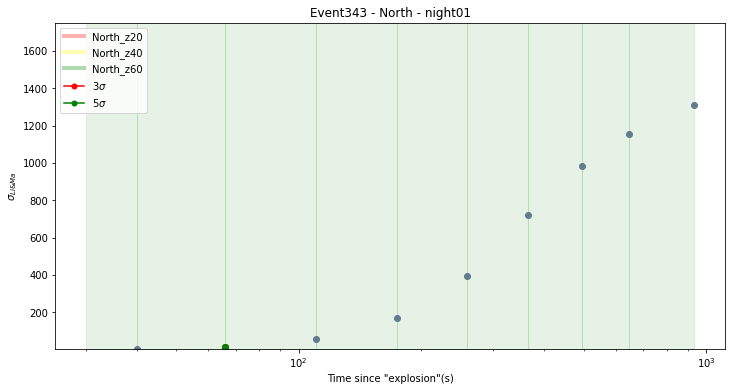

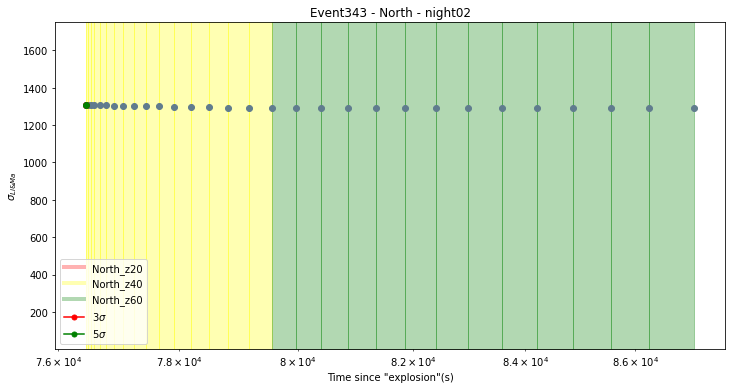

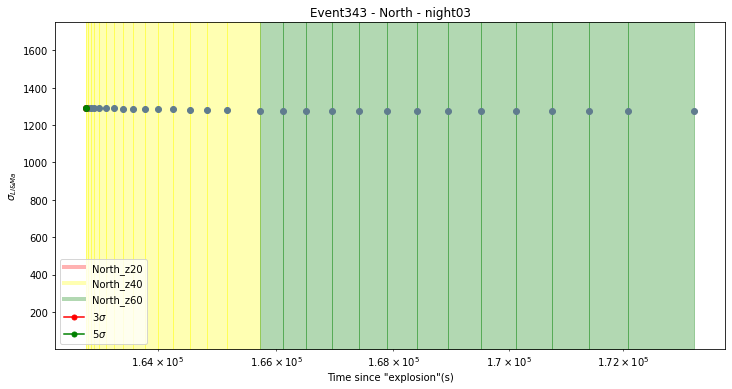

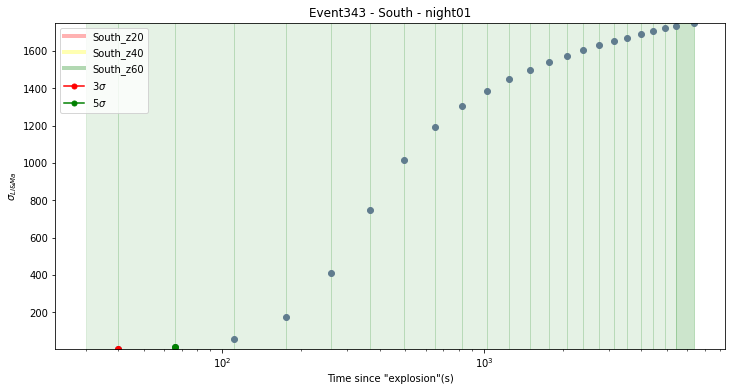

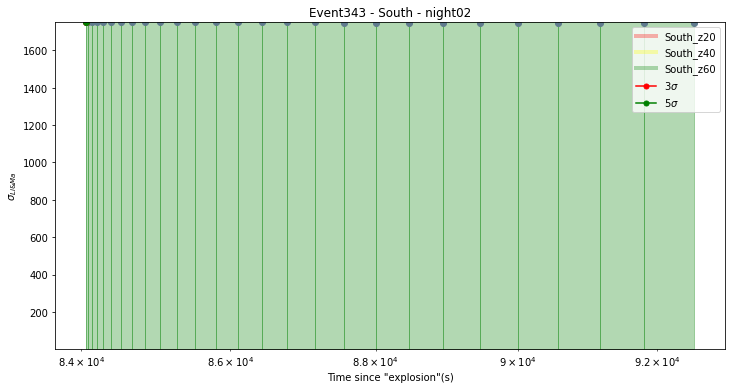

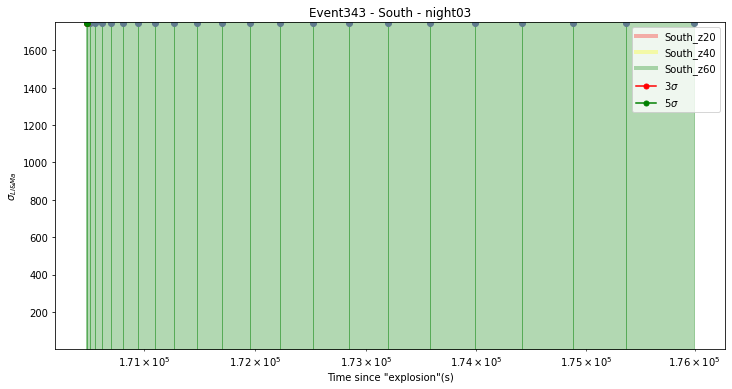

In [5]:
for event in events:
    for site in sites:
        for night in data[event][site]:
            if night != 'first_night_start':
                
                if type(data[event][site][night]['irf']) == float:
                    print(f'\tThis contains NaNs event---> the source is not observable at the site {site} during {night}.')
                else:

                    fig, axes = plt.subplots(1 ,figsize=(12,6))
                    for i in range(len(data[event][site][night]['irf'])):
                        t_start= data[event][site][night]['t_start'][i]
                        t_stop = data[event][site][night]['t_stop'][i]
                        if data[event][site][night]['irf'][i].endswith('0.5h'):
                            a=0.1
                        elif data[event][site][night]['irf'][i].endswith('5h'):
                            a= 0.2
                        elif data[event][site][night]['irf'][i].endswith('50h'):
                            a=0.3

                        if 'z20' in data[event][site][night]['irf'][i]:
                            axes.fill_between([t_start,t_stop], color_min, color_max, color='red', alpha=a, 
                                              label=f'IRF z20')
                        elif 'z40' in data[event][site][night]['irf'][i]:
                            axes.fill_between([t_start,t_stop], color_min, color_max, color='yellow', alpha=a, 
                                              label='IRF z40')
                        elif 'z60' in data[event][site][night]['irf'][i]:
                            axes.fill_between([t_start,t_stop], color_min, color_max, color='green', alpha=a,
                                              label='IRF z60')

                axes.errorbar (data[event][site][night]['t_stop'], data[event][site][night]['significance'], 
                               yerr= data[event][site][night]['variance'], color='#607c8e',fmt='o')
                if '3sigma' in data[event][site][night].keys():
                    axes.errorbar (data[event][site][night]['3sigma'][0], data[event][site][night]['3sigma'][1], 
                                   color='red',fmt='o')
                if '5sigma' in data[event][site][night].keys():
                    axes.errorbar (data[event][site][night]['5sigma'][0], data[event][site][night]['5sigma'][1], 
                                   color='g',fmt='o')
                axes.set_xlabel(r'Time since "explosion"(s)')
                axes.set_ylabel(r'$\sigma_{Li&Ma}$')
                axes.set_xscale('log')
                axes.set_ylim(color_min,color_max)
                axes.legend(custom_lines, [f'{site}_z20', f'{site}_z40', f'{site}_z60',r'$3\sigma$', r'$5\sigma$'])
                axes.set_title(f'{event} - {site} - {night}')
                   



plt.show()
